In [0]:
!pip install tensorflow
!pip install keras

In [0]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf
from keras import layers
from keras import models
from keras.utils import to_categorical
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(f'Train images shape {train_images.shape}')
print('Total traning images {0}'.format(len(train_labels)))
print(f'Test images shape {test_images.shape}')
print('Total test images {0}'.format(len(test_labels)))


Train images shape (60000, 28, 28)
Total traning images 60000
Test images shape (10000, 28, 28)
Total test images 10000


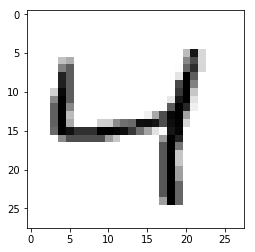

In [0]:
plt.imshow(train_images[2], cmap=plt.cm.binary)
plt.show()

In [0]:
train_images = train_images.reshape((60000, 28 ,28, 1)) # creating vectors of (28, 28, 1) matrix, 1 is color channel
train_images = train_images.astype('float32')/255


train_labels = to_categorical(train_labels) # turning into one-hot encoded

test_images = test_images.reshape((10000, 28, 28, 1))# creating vectors of (28, 28, 1) matrix  1 is color channel
test_images = test_images.astype('float32')/255

test_labels = to_categorical(test_labels)# turning into one-hot encoded

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape= (28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2))) # no params
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten()) # no params added
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [0]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print(model.summary())

model.fit(train_images, train_labels, epochs = 5, batch_size=64)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test Accuracy, {test_acc}')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                36928     
__________

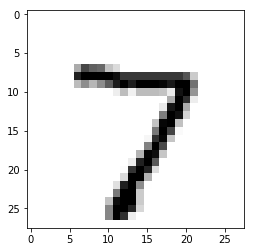

7

In [0]:
index = 0
plt.imshow(test_images[index].reshape(28,28), cmap=plt.cm.binary)
plt.show()
model.predict([[test_images[index]]]).argmax()